In [48]:
import numpy as np
from scipy.sparse.linalg import eigsh
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline
import plotly.plotly as py
import plotly.graph_objs as go

## Задание 12
# Решение уравнения теплопроводности схемой Кранка-Николсон
## Параметры сетки и функции
Здесь задаются все требуемые при расчете параметры и функции.

In [86]:
nt = 100
dt = 0.005

N = 1000
h = 1/(N+1)
xnet = np.array([h*(i+1) for i in range(N)])

D = 1
mu = D*dt/2/h**2
u0 = np.sin(np.pi*xnet)

In [87]:
ones = np.ones((N,))
A = np.diag(-mu*ones[1:], -1) + np.diag((1+2*mu)*ones, 0) + np.diag(-mu*ones[1:], +1)
Ainv = np.linalg.inv(A)
B = A = np.diag(mu*ones[1:], -1) + np.diag((1-2*mu)*ones, 0) + np.diag(mu*ones[1:], +1)
AB = np.dot(Ainv, B)

In [88]:
u = [u0]
for t in range(nt):
    u.append(np.dot(AB,u[-1]))

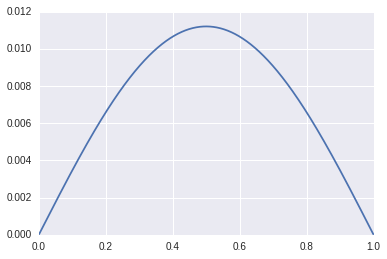

In [89]:
plt.plot(xnet, u[-10])

In [35]:
u[-1]

array([[ 0.003126  ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.00622739,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.00930461, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.00930461,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.00622739,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.003126  ]])

In [65]:
from ipywidgets import interactive
from ipywidgets import widget_int
from IPython.display import display

In [109]:
def solution(a=0):
    plt.plot(xnet, u[a])
    plt.ylim(0,1)
    plt.xlim(0,1)
    plt.text(0.1, 0.9, 't = %.3f'% float(a*dt))
    plt.text(0.1, 0.8, 'step = %d'% float(a))

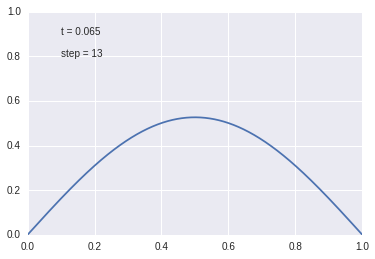

In [110]:
a_slider = widget_int.IntSlider(min=0, max=100)
w=interactive(solution, a=a_slider)
display(w)